# Assignment 2

## Problem 1:Linear Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn



### Task 1:Load the dataset named assignment2_part1.csv 



In [2]:
data = pd.read_csv("assignment2_part1.csv",index_col=0)
data.head()

,x,y
0,-15.0,-2156.994097
1,-14.5,-1956.523904
2,-14.0,-1778.151738
3,-13.5,-1610.924846
4,-13.0,-1456.176307


In [3]:
 data.shape

(80, 2)

### Task 2:Split this given dataset into training set,testing set and validation set (80% data as training set,10% as testing and other 10% as validation)

In [4]:
from sklearn.utils import shuffle
data = shuffle(data)
data.reset_index(inplace=True)

In [5]:
data.shape

(80, 3)

In [6]:
data1= data[['x', 'y']].loc[0:63,:]
data2= data[['x', 'y']].loc[64:71,:]
data3= data[['x', 'y']].loc[72:80,:]
print(data1.shape,data2.shape,data3.shape)

(64, 2) (8, 2) (8, 2)


In [7]:
train=data1
test=data2
val=data3

In [8]:
print(train.shape,test.shape,val.shape)

(64, 2) (8, 2) (8, 2)


### Task 3: Visualize the data and try to fit a linear (regression) model to it and comment whether you think this data is suitable to fit a linear model.

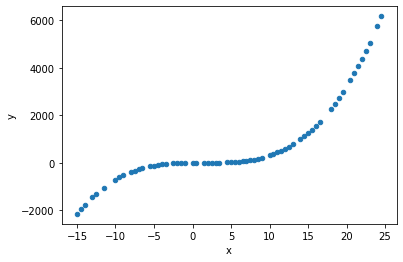

In [9]:
train.plot(x='x',y='y',kind='scatter')


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = smf.ols(formula='y~x', data = data1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     195.8
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           7.47e-21
Time:                        16:57:56   Log-Likelihood:                -524.67
No. Observations:                  64   AIC:                             1053.
Df Residuals:                      62   BIC:                             1058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5157    123.342      0.004      0.9

In [12]:
#Althouh R2 values are high for trainings data  we can comment  that data is not suitable for linear regression by looking to the plots

### Task 4: Visualize the regression fit

In [13]:
data1=train.sort_values(by='x')
data1.head()

,x,y
4,-15.0,-2156.994097
34,-14.5,-1956.523904
7,-14.0,-1778.151738
12,-13.0,-1456.176307
53,-12.5,-1302.029411


In [14]:
from sklearn.linear_model import LinearRegression

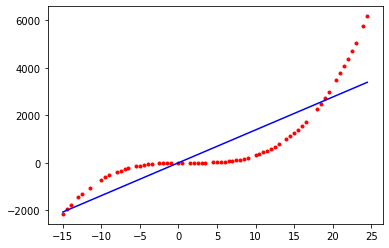

In [15]:
data1['ypred']=lm.predict(data1)  
plt.plot(data1.x,data1.y,'.r')  
plt.plot(data1.x,data1.ypred,'b')

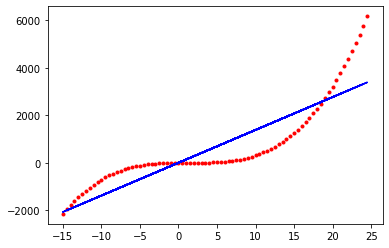

In [16]:
data['ypred']=lm.predict(data)  
plt.plot(data.x,data.y,'.r')  
plt.plot(data.x,data.ypred,'b')

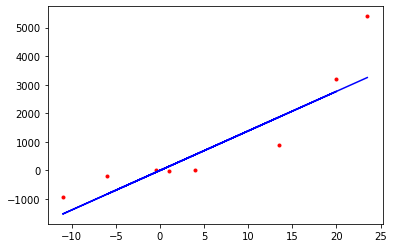

In [17]:
val['ypred']=lm.predict(val)  
plt.plot(val.x,val.y,'.r')  
plt.plot(val.x,val.ypred,'b')

#dont do 

### Task 5: Try to introduce another regressor variable if you think that linear model was not apt for this.

In [18]:
#Your code here
#introduce another regressor being a square of x
data1['x2']=data1.x**2

### Task 6: Fit a regression model to it,now with 2 regressor variables and also visualize the results

In [19]:
#fit a multi-variate linear model using x and x**2 as two regressors
lm = smf.ols(formula='y~x+x2', data = data1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     228.2
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           4.81e-29
Time:                        16:57:57   Log-Likelihood:                -501.87
No. Observations:                  64   AIC:                             1010.
Df Residuals:                      61   BIC:                             1016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -538.5678    110.300     -4.883      0.0

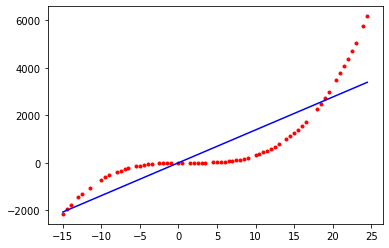

In [20]:
#visualize regression fit
 
plt.plot(data1.x,data1.y,'.r')  
plt.plot(data1.x,data1.ypred,'b')  

### Task 7: Generate regressors in the validation sample in range from M=12(Max power of x) and compute the model prediction.Visualize the fit of the model.

In [21]:
for p in range(1,13): #add more powers of x up to 9'th
    val['x%d'%p]=val.x**p

In [22]:
R2 = []; Params = []
for M in range(1,13):
    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    lm = smf.ols(formula = formula, data = val).fit()
    R2.append(lm.rsquared)
    Params.append(lm.params)

In [23]:
val.head()

,x,y,ypred,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
72,13.5,877.324955,1868.650639,13.5,182.25,2460.375,33215.0625,448403.34375,6.053445e+06,8.172151e+07,1.103240e+09,1.489375e+10,2.010656e+11,2.714385e+12,3.664420e+13
73,-6.0,-190.366598,-829.766440,-6.0,36.00,-216.000,1296.0000,-7776.00000,4.665600e+04,-2.799360e+05,1.679616e+06,-1.007770e+07,6.046618e+07,-3.627971e+08,2.176782e+09
74,1.0,-3.617848,138.896101,1.0,1.00,1.000,1.0000,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75,-11.0,-917.935911,-1521.668256,-11.0,121.00,-1331.000,14641.0000,-161051.00000,1.771561e+06,-1.948717e+07,2.143589e+08,-2.357948e+09,2.593742e+10,-2.853117e+11,3.138428e+12
76,4.0,7.489708,554.037190,4.0,16.00,64.000,256.0000,1024.00000,4.096000e+03,1.638400e+04,6.553600e+04,2.621440e+05,1.048576e+06,4.194304e+06,1.677722e+07


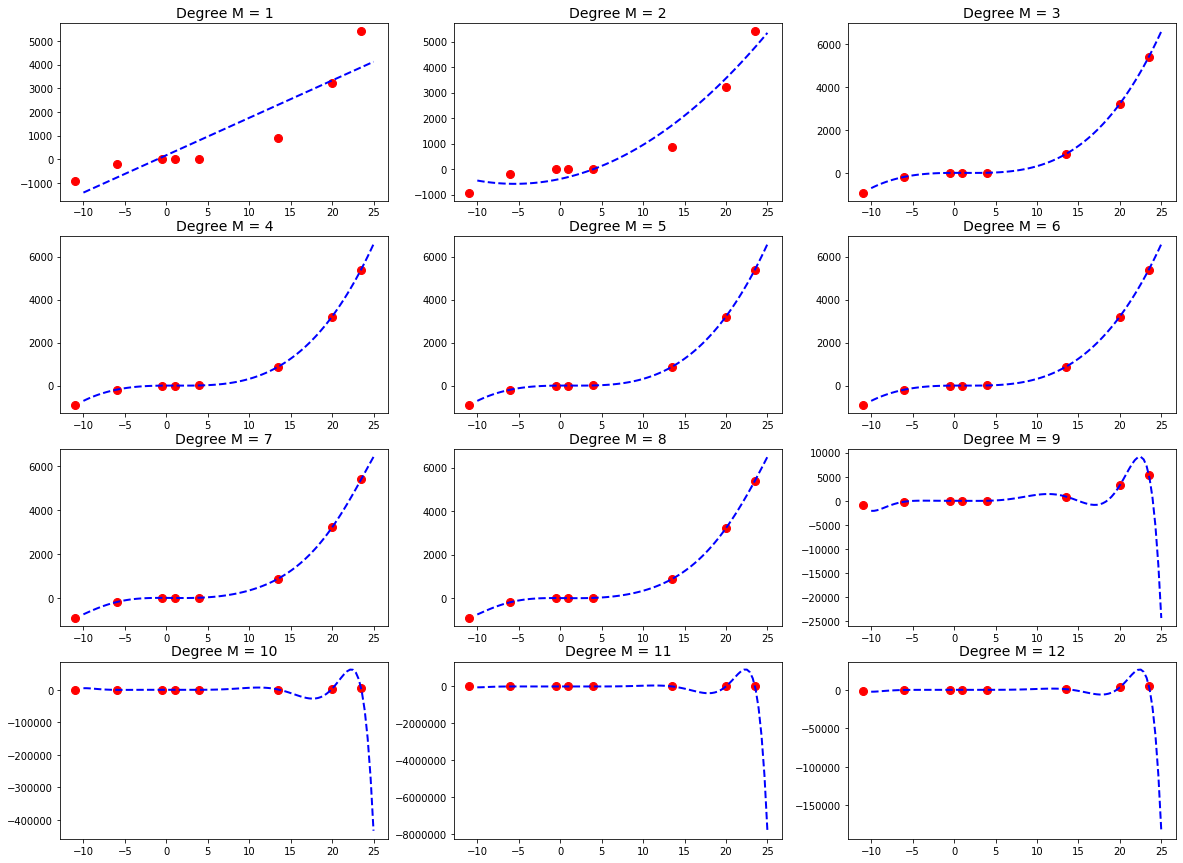

In [24]:
#visualize all the fits
plt.figure(figsize = (20,15))

for M in range(1,13):
    plt.subplot(4,3,M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-10,25,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    plt.plot(val.x, val.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.title('Degree M = %d'%(M), fontsize = 14)
    

In [25]:
### only 12 \th degree

### Task 8:Compute R2 over the validation data

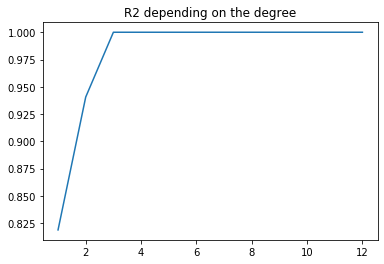

In [26]:
 plt.title('R2 depending on the degree')
plt.plot(range(1,13),R2)

### Task 9: Did you get an optimal value with M=12?

In [27]:
#after M=2themodel  was sucesfull but  it has an  overfitting due to low number of datapoints 

### Task 10:Generate regressors in the test sample and compute the model prediction

In [28]:
for p in range(1,13):
    test['x%d'%p]=test.x**p

In [29]:
R2 = []; Params = []
for M in range(1,13):
    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    lm = smf.ols(formula = formula, data = test).fit()
    R2.append(lm.rsquared)
    Params.append(lm.params)

### Task 11:Visulaize results of Task 10.

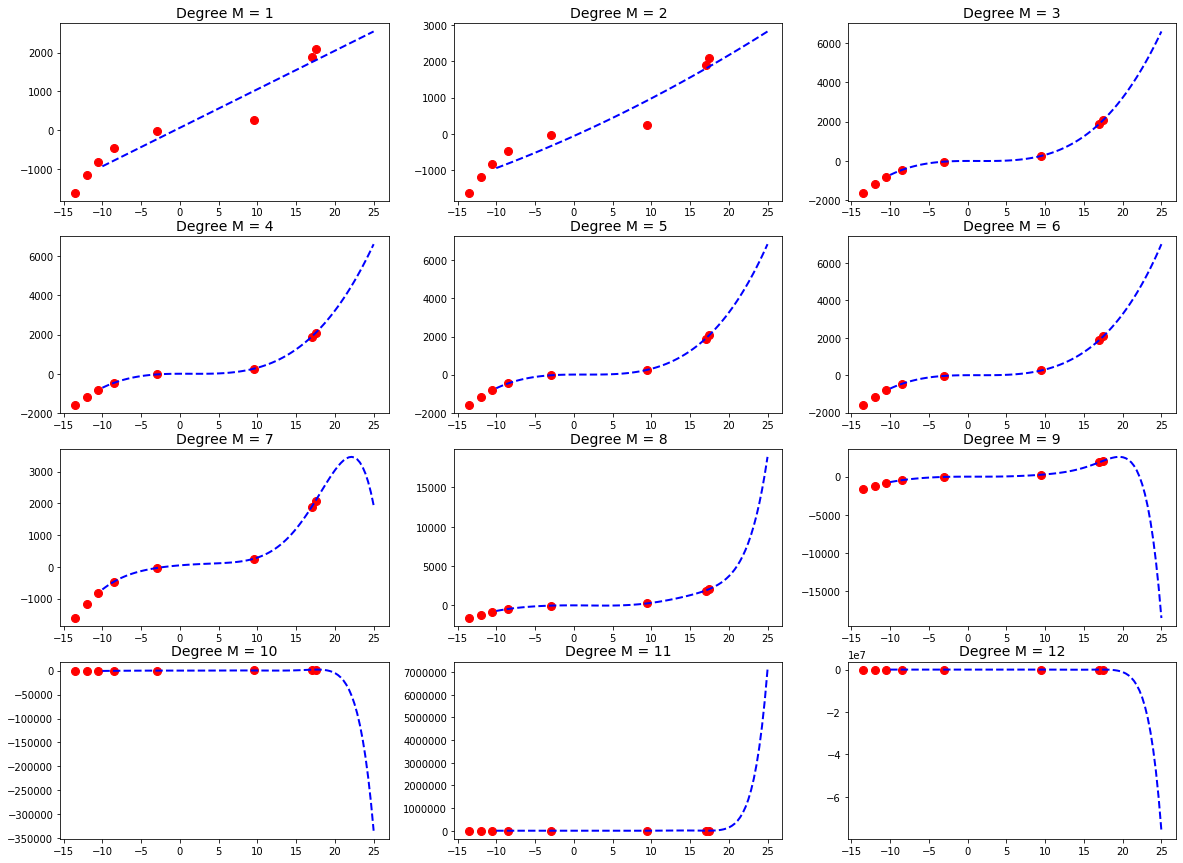

In [30]:
#visualize all the fits
plt.figure(figsize = (20,15))

for M in range(1,13):
    plt.subplot(4,3,M)   # Plot subfigure, M controls the location
    x_fit = np.linspace(-10,25,100)  # For smoothing the fitted curve
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,  # Generate our fitted curve
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)  # 1 means computation runs row-wise
    # Pay attention how we obtain the results by controlling the axes on which the operations are performed

    plt.plot(data2.x1, data2.y, 'ro', markersize = 8)    # Red dots, the observations
    plt.plot(x_fit, y_fit, 'b--', lw = 2)                # Blue dashed line, our fitted curve
    plt.title('Degree M = %d'%(M), fontsize = 14)

## Problem 2:Refer the in class session_05_02 diagnostics python notebook ,to complete this part of the assignment.

### Task 1: Perform regression on Advanced vs Other, "Advanced" which incorporated Master, Doctorate and ProfSchool and "Other" incorporating less than Bachelor.Your regression model will be between predicted and observed income.

In [31]:
#Hint: you might want to use the dataframe "data4" in the session_05_02 diagnostics python notebook.
data4 = pd.read_csv('data/IncomeEduReg.csv')
data4.head()


,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,10001,77512.0,16328,1389,1665,2075,6061,3412,519,1207
1,10002,26905.0,60932,21170,12718,8532,12721,4001,641,1149
2,10003,79088.0,41182,1499,2810,4516,17958,9094,1626,3679
3,10004,98020.0,2279,29,87,305,984,550,86,238
4,10005,99633.0,5954,133,103,454,2745,1637,219,663


In [32]:
data4.dropna(inplace = True)  #drop NAN to avoid invalid computation
data4 = pd.concat([data4.IncomePerCapita,      # Convert unit to 1k USD, only for scaling purpose
        data4.iloc[:,3:].div(data4.PopOver25, axis = 0)],  # Compute the percentage, column-wise
        axis = 1)  # Concatenate the Income column with percentages, row-wise

In [33]:
 data4['Advanced']=data4['Master']+ data4['Doctorate']+ data4['ProfSchool']
 data4['Other']=data4['LessThanHS']+ data4['HighSchool']+ data4['SomeCollege'] 
data4.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool,Advanced,Other
0,77512.0,0.085069,0.101972,0.127082,0.371203,0.208966,0.031786,0.073922,0.314674,0.314123
1,26905.0,0.347436,0.208724,0.140025,0.208774,0.065663,0.010520,0.018857,0.095040,0.696186
2,79088.0,0.036399,0.068234,0.109660,0.436064,0.220825,0.039483,0.089335,0.349643,0.214293
3,98020.0,0.012725,0.038175,0.133831,0.431768,0.241334,0.037736,0.104432,0.383502,0.184730
4,99633.0,0.022338,0.017299,0.076251,0.461035,0.274941,0.036782,0.111354,0.423077,0.115888


In [34]:
lm = smf.ols(formula ='IncomePerCapita ~ Other + Advanced + Bachelor' , data=data4).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     472.5
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           6.38e-72
Time:                        16:58:10   Log-Likelihood:                -1954.6
No. Observations:                 181   AIC:                             3915.
Df Residuals:                     178   BIC:                             3925.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.795e+04   1248.980     46.398      0.0

In [35]:
 data4['predictedIncomePerCapita']=lm.predict()

In [36]:
data4[['predictedIncomePerCapita','IncomePerCapita']].head()

,predictedIncomePerCapita,IncomePerCapita
0,76489.828365,77512.0
1,26499.639194,26905.0
2,87068.287324,79088.0
3,92804.494199,98020.0
4,101812.027598,99633.0


In [37]:
data4 = data4.sort_values(by='IncomePerCapita')
data4.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool,Advanced,Other,predictedIncomePerCapita
195,8278.0,0.283784,0.500000,0.094595,0.081081,0.040541,0.000000,0.000000,0.040541,0.878378,8226.074445
82,11429.0,0.429072,0.277879,0.202399,0.068384,0.014330,0.003361,0.004575,0.022266,0.909350,4121.575754
102,11609.0,0.357709,0.280133,0.254692,0.084944,0.019463,0.000000,0.003059,0.022522,0.892534,5279.280350
84,12157.0,0.407106,0.257830,0.226376,0.083657,0.019744,0.001194,0.004093,0.025031,0.891312,5639.296103
83,12442.0,0.433767,0.276913,0.195992,0.070859,0.017907,0.001748,0.002814,0.022469,0.906672,4323.855222


### Task 2: Visualize the regression fit by plotting the observation versus our prediction for the income per zip code.

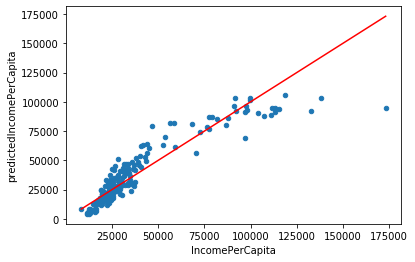

In [38]:
fig,ax=plt.subplots()
data4.plot(ax=ax,kind='scatter',x='IncomePerCapita',y='predictedIncomePerCapita') #show the data obsveres income 
ax.plot(data4.IncomePerCapita,data4.IncomePerCapita,'r-'); #show the regression line

## Problem 3:Refer in class session_05_01 Scaling python notebook to complete this part of the assignment.

### Task 1:Establish a scaling relationship  Y∼CXq  between total, violent and property crime vs population (by running log-scale regression where Crime>0). Visualize on the log scale. Does  q=1  fall into the 95% confidence interval? What about 99% CI?

In [39]:
msa  = pd.read_csv('data/crime2014/msalist1.csv',encoding='cp1252') 

In [40]:
#create dictionary of names
msaNames={r['msa']:r['msa_name'] for i,r in msa.iterrows()}

In [41]:
 
demographics   = pd.read_csv('data/acs2014/R11460953_SL050.csv',encoding='cp1252') 

In [42]:
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)

In [43]:
#add cumulative city income
demographics['Income']=demographics.Population*demographics['Per capita income']

In [44]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
demomsa.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income,ID,msa,msa_name,Geo_FIPS,county
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584,1001,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455,1003,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830,1007,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145,1009,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,05000US01015,"Calhoun County, Alabama","Calhoun County, Alabama",15,117186,193.41850,605.867678,40919,21306,2496764916,1015,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [45]:
msaDemo = demomsa.groupby(by='msa').sum().loc[:,[u'Population', u'Area', u'Income']]

In [46]:
#Your code here
crime2014 = pd.read_csv('data/crime2014/R11460954_SL050.csv') #Load crime dataA
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,SE_T001_001,SE_T002_001,SE_T002_002,SE_T002_003,SE_T003_001,...,SE_T006_001,SE_T006_002,SE_T006_003,SE_T006_004,SE_T007_001,SE_T007_002,SE_T007_003,SE_T007_004,SE_T008_001,SE_T009_001
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,870.114631,...,414,170.0,199.0,45.0,747.359870,306.886903,359.238198,81.234768,NaN,NaN
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,379.789217,...,662,230.0,405.0,27.0,330.816397,114.936210,202.387675,13.492512,NaN,NaN
2,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128,539.294083,...,128,68.0,55.0,5.0,476.066501,252.910328,204.559824,18.596348,NaN,NaN
3,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,382.120323,...,82,42.0,34.0,6.0,364.347285,186.616902,151.070826,26.659557,NaN,NaN
4,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1755.054661,...,923,311.0,524.0,88.0,1599.126804,538.817374,907.846636,152.462794,NaN,NaN


In [47]:
demographics['Income']=demographics.Population*demographics['Per capita income']

In [48]:
msaNames={r['msa']:r['msa_name'] for i,r in msa.iterrows()}

In [49]:
crime2014Names={r['Geo_NAME']:r['Geo_QNAME'] for i,r in crime2014.iterrows()}

In [50]:
len(crime2014.Geo_FIPS.unique())

2579

In [51]:
#rename some columns
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                             u'SE_T002_001' : 'Crimes',\
                          u'SE_T002_002' : 'Violent Crimes', \
                          u'SE_T002_003' : 'Property Crimes' }, inplace=True)

crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'Crimes' , 'Violent Crimes', 'Property Crimes']]

 

In [52]:
crime2014 .head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662
2,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128
3,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82
4,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923


In [53]:
#convert some location identifiers from string to numeric
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
crime2014['ID'] = crime2014.Geo_FIPS.apply(num)
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
crimemsa = pd.merge(crime2014, msa, on='ID', how='inner')
crimemsa.head()

,Geo_FIPS_x,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes,ID,msa,msa_name,Geo_FIPS_y,county
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,1001.0,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,1003.0,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,1007.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1009.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,01015,Calhoun County,"Calhoun County, Alabama",1,015,115916.0,486,15,471,1015.0,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [54]:
msaCrime = crimemsa.groupby(by='msa').sum().loc[:,[u'Population', u'Crimes', u'Violent Crimes', u'Property Crimes']]
msaCrime.head()

,Population,Crimes,Violent Crimes,Property Crimes
msa,,,,
10180,168592.0,492,62,430
10420,703825.0,2397,106,2291
10500,151670.0,1364,107,1257
10540,119356.0,1092,23,1069
10580,880167.0,1590,91,1499


In [55]:
msaCrime =msaCrime .loc[msaCrime['Crimes']>0]
msaCrime =msaCrime .loc[msaCrime['Violent Crimes']>0]
msaCrime =msaCrime .loc[msaCrime['Property Crimes']>0]

In [56]:
logPop = np.log(msaCrime['Population'])
logCrime = np.log(msaCrime['Crimes'])
logViolent = np.log(msaCrime['Violent Crimes'])
logProperty  = np.log(msaCrime['Property Crimes'])
dataLog = pd.DataFrame(data=[logCrime,logProperty, logViolent,logPop]).T
dataLog.sort_values(by='Population', ascending=False, inplace=True) #Sorting values for better visualization
dataLog.head()

,Crimes,Property Crimes,Violent Crimes,Population
msa,,,,
31080,9.994516,9.714927,8.583543,16.400430
35620,9.611195,9.495444,7.397562,16.097165
16980,8.983063,8.881836,6.642487,16.062217
19100,9.006877,8.895630,6.755769,15.754875
26420,11.198352,11.038191,9.287764,15.685801


In [57]:
####1.1 regression between total crime vs population

In [58]:
msacrime_log = smf.ols(formula = 'logCrime~logPop', data = msaCrime).fit()
msacrime_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logCrime   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     300.3
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           2.70e-48
Time:                        16:58:12   Log-Likelihood:                -452.38
No. Observations:                 332   AIC:                             908.8
Df Residuals:                     330   BIC:                             916.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1470      0.601     -5.236      0.000      -4.329      -1.965
logPop         0.8276      0.048     17.329      0.000       0.734       0.922
==============================================================================
Omnibus:                      154.980   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1274.415
Skew:                          -1.741   Prob(JB):                    1.84e-277
Kurtosis:                      11.944   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#𝑙𝑜𝑔(𝐼𝑛𝑐𝑜𝑚𝑒)=0.82l𝑜𝑔(𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛)-3.1470
#𝐼𝑛𝑐𝑜𝑚𝑒=𝑒𝑥𝑝(^-3.1470)𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛^^0.82


In [60]:
msacrime_log.conf_int(alpha=0.05) # 95% CI

,0,1
Intercept,-4.329252,-1.964701
logPop,0.733644,0.921536


In [61]:
#As the confidence intervals tells us, we're 95% confident that the exponent of the scaling law is between [0.73,0.92], i.e. above The estimate  q=0.82 is lower than 1 but somewhat close to 1. with 5% confidence level 
#This way we can reject the hypothesis that  𝑞=1 at the 95% confidence levelb\

In [62]:
#SCATTER AND REGRESSIONS 

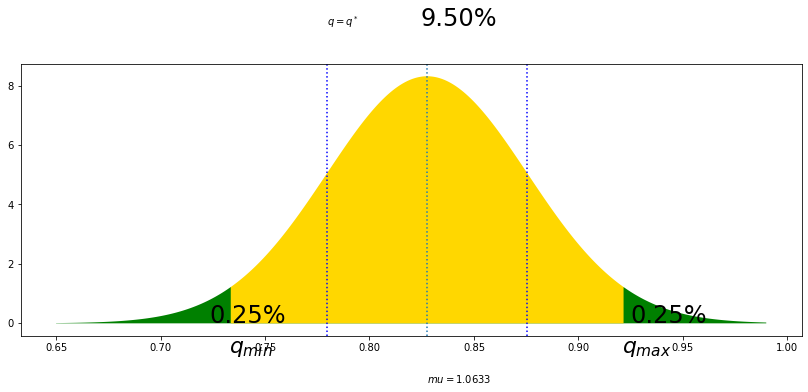

In [63]:

from scipy.stats import norm
mu=0.8276; sigma=0.048
q0=mu-sigma
q = 0.05/2
x = np.arange(0.65,0.99,0.0001)
y = norm.pdf(x, loc=mu, scale=sigma)    # default setting with location parameter 0 and scale parameter 1
t0 = norm.ppf(q, mu, sigma)   # lower bound
t1 = norm.isf(q, mu, sigma)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
plt.axvline(x=mu,linestyle=':')
plt.axvline(x=q0,linestyle=':',c='b')
plt.axvline(x=2*mu-q0,linestyle=':',c='b')
ax.text(mu, -2, '$mu=1.0633$', fontsize = 10)
ax.text(q0, 10, '$q=q^*$', fontsize = 10)
ax.text(t1+0.003, 0.0012, '%.2f%%'%(10*q), fontsize = 24)
ax.text(t0-0.01, 0.0012, '%.2f%%'%(10*q), fontsize = 24)
ax.text(mu-0.003, 10, '%.2f%%'%(10*(1-q*2)), fontsize = 24)
ax.text(t0-0.001, -1, '$q_{min}$', fontsize = 22)
ax.text(t1-0.001, -1, '$q_{max}$', fontsize = 22)
plt.show()

In [64]:
msacrime_log.conf_int(alpha=0.01) # 99% CI

,0,1
Intercept,-4.704055,-1.589899
logPop,0.703862,0.951319


In [65]:
# with 99.9% confidence we can claim q smaller than 1 we can reject 𝑞=1 at the 95% confidence level

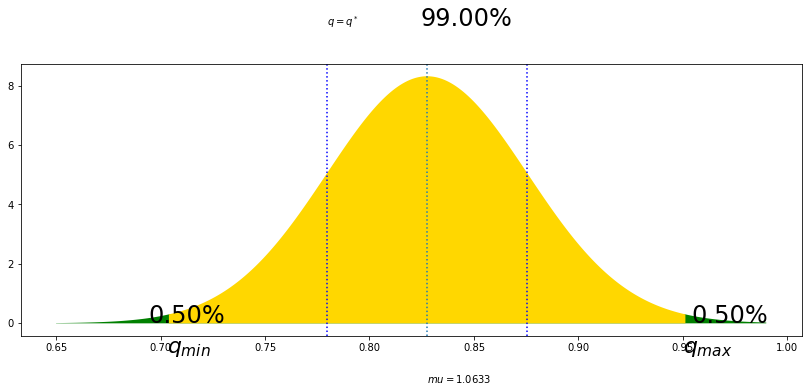

In [66]:
mu=0.8276; sigma=0.048
q0=mu-sigma
q = 0.01/2
x = np.arange(0.65,0.99,0.0001)
y = norm.pdf(x, loc=mu, scale=sigma)    # default setting with location parameter 0 and scale parameter 1
t0 = norm.ppf(q, mu, sigma)   # lower bound
t1 = norm.isf(q, mu, sigma)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
plt.axvline(x=mu,linestyle=':')
plt.axvline(x=q0,linestyle=':',c='b')
plt.axvline(x=2*mu-q0,linestyle=':',c='b')
ax.text(mu, -2, '$mu=1.0633$', fontsize = 10)
ax.text(q0, 10, '$q=q^*$', fontsize = 10)
ax.text(t1+0.003, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(t0-0.01, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(mu-0.003, 10, '%.2f%%'%(100*(1-q*2)), fontsize = 24)
ax.text(t0-0.001, -1, '$q_{min}$', fontsize = 22)
ax.text(t1-0.001, -1, '$q_{max}$', fontsize = 22)
plt.show()


In [67]:
#1.2## regression between violent  vs population

In [68]:
msacrime1_log= smf.ols(formula = 'logViolent~logPop', data = msaCrime).fit()
msacrime1_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             logViolent   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     329.7
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           1.43e-51
Time:                        16:58:14   Log-Likelihood:                -465.04
No. Observations:                 332   AIC:                             934.1
Df Residuals:                     330   BIC:                             941.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3011      0.624    -10.092      0.000      -7.529      -5.073
logPop         0.9009      0.050     18.157      0.000       0.803       0.998
==============================================================================
Omnibus:                       19.574   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.759
Skew:                          -0.468   Prob(JB):                     2.55e-06
Kurtosis:                       3.993   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
msacrime1_log.conf_int(alpha=0.05) # 95% CI

,0,1
Intercept,-7.529392,-5.072895
logPop,0.803257,0.998455


In [70]:
#we reject the  q=1 hypothtsis 

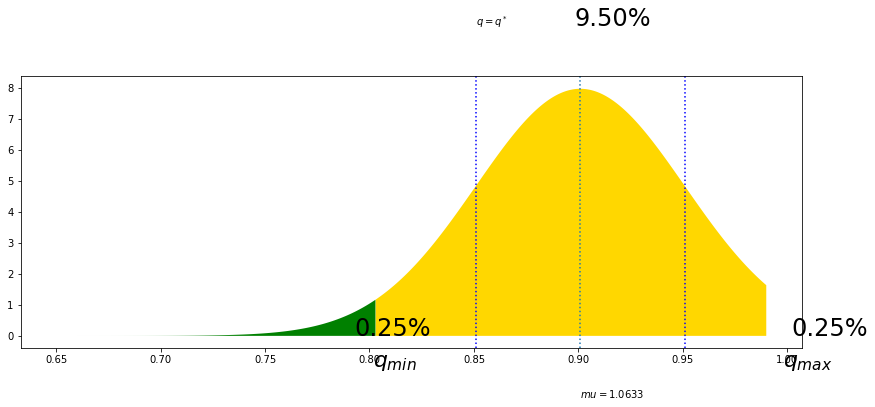

In [71]:

from scipy.stats import norm
mu=0.9009; sigma=0.05
q0=mu-sigma
q = 0.05/2
x = np.arange(0.65,0.99,0.0001)
y = norm.pdf(x, loc=mu, scale=sigma)    # default setting with location parameter 0 and scale parameter 1
t0 = norm.ppf(q, mu, sigma)   # lower bound
t1 = norm.isf(q, mu, sigma)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
plt.axvline(x=mu,linestyle=':')
plt.axvline(x=q0,linestyle=':',c='b')
plt.axvline(x=2*mu-q0,linestyle=':',c='b')
ax.text(mu, -2, '$mu=1.0633$', fontsize = 10)
ax.text(q0, 10, '$q=q^*$', fontsize = 10)
ax.text(t1+0.003, 0.0012, '%.2f%%'%(10*q), fontsize = 24)
ax.text(t0-0.01, 0.0012, '%.2f%%'%(10*q), fontsize = 24)
ax.text(mu-0.003, 10, '%.2f%%'%(10*(1-q*2)), fontsize = 24)
ax.text(t0-0.001, -1, '$q_{min}$', fontsize = 22)
ax.text(t1-0.001, -1, '$q_{max}$', fontsize = 22)
plt.show()

In [72]:
msacrime1_log.conf_int(alpha=0.01) # 99% CI

,0,1
Intercept,-7.918769,-4.683518
logPop,0.772317,1.029396


In [73]:
#we can accept q=1 hypothesis at  99% CI

In [74]:
mu=0.09; sigma=0.05
q0=mu-sigma
q = 0.01/2
x = np.arange(0.65,0.99,0.0001)
y = norm.pdf(x, loc=mu, scale=sigma)    # default setting with location parameter 0 and scale parameter 1
t0 = norm.ppf(q, mu, sigma)   # lower bound
t1 = norm.isf(q, mu, sigma)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
plt.axvline(x=mu,linestyle=':')
plt.axvline(x=q0,linestyle=':',c='b')
plt.axvline(x=2*mu-q0,linestyle=':',c='b')
ax.text(mu, -2, '$mu=1.0633$', fontsize = 10)
ax.text(q0, 10, '$q=q^*$', fontsize = 10)
ax.text(t1+0.003, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(t0-0.01, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(mu-0.003, 10, '%.2f%%'%(100*(1-q*2)), fontsize = 24)
ax.text(t0-0.001, -1, '$q_{min}$', fontsize = 22)
ax.text(t1-0.001, -1, '$q_{max}$', fontsize = 22)
plt.show()

RuntimeError: libpng signaled error

<Figure size 1008x360 with 1 Axes>

In [75]:
#1.3 regression between  property  vs populationb

In [76]:
msacrime2_log = smf.ols(formula = 'logProperty ~logPop', data = msaCrime).fit()
msacrime2_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            logProperty   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     262.2
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           8.13e-44
Time:                        16:58:15   Log-Likelihood:                -471.37
No. Observations:                 332   AIC:                             946.7
Df Residuals:                     330   BIC:                             954.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1738      0.636     -4.987      0.000      -4.426      -1.922
logPop         0.8189      0.051     16.194      0.000       0.719       0.918
==============================================================================
Omnibus:                      209.020   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2938.284
Skew:                          -2.348   Prob(JB):                         0.00
Kurtosis:                      16.797   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
msacrime2_log.conf_int(alpha=0.05) # 95% CI

,0,1
Intercept,-4.425646,-1.921917
logPop,0.719412,0.918364


In [78]:
#we can rejet q=1 hyp 95% CI

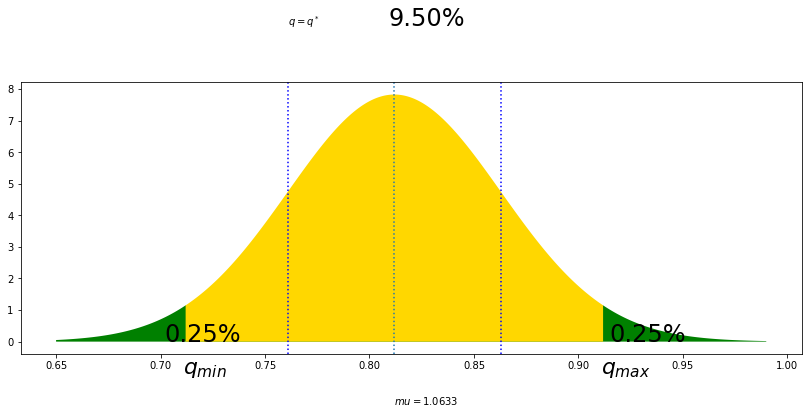

In [79]:
from scipy.stats import norm
mu=0.8119; sigma=0.051
q0=mu-sigma
q = 0.05/2
x = np.arange(0.65,0.99,0.0001)
y = norm.pdf(x, loc=mu, scale=sigma)    # default setting with location parameter 0 and scale parameter 1
t0 = norm.ppf(q, mu, sigma)   # lower bound
t1 = norm.isf(q, mu, sigma)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
plt.axvline(x=mu,linestyle=':')
plt.axvline(x=q0,linestyle=':',c='b')
plt.axvline(x=2*mu-q0,linestyle=':',c='b')
ax.text(mu, -2, '$mu=1.0633$', fontsize = 10)
ax.text(q0, 10, '$q=q^*$', fontsize = 10)
ax.text(t1+0.003, 0.0012, '%.2f%%'%(10*q), fontsize = 24)
ax.text(t0-0.01, 0.0012, '%.2f%%'%(10*q), fontsize = 24)
ax.text(mu-0.003, 10, '%.2f%%'%(10*(1-q*2)), fontsize = 24)
ax.text(t0-0.001, -1, '$q_{min}$', fontsize = 22)
ax.text(t1-0.001, -1, '$q_{max}$', fontsize = 22)
plt.show()

In [80]:
msacrime2_log.conf_int(alpha=0.01) # 99% CI

,0,1
Intercept,-4.822510,-1.525053
logPop,0.687877,0.949899


In [81]:
#we can again reject q=1 hythesis whitin # 99% CI

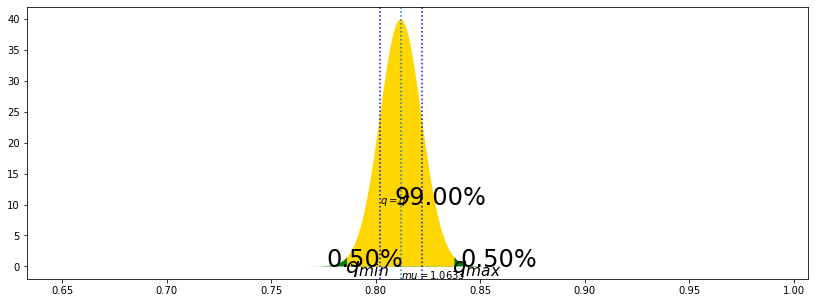

In [82]:
mu=0.8119; sigma=0.01
q0=mu-sigma
q = 0.01/2
x = np.arange(0.65,0.99,0.0001)
y = norm.pdf(x, loc=mu, scale=sigma)    # default setting with location parameter 0 and scale parameter 1
t0 = norm.ppf(q, mu, sigma)   # lower bound
t1 = norm.isf(q, mu, sigma)   # upper bound, or simply "-t0" because of symmetry

ax = plt.figure(figsize=(14,5)).add_subplot(111)
ax.fill_between(x[(x<t0) | (x>t1)], 0, y[(x<t0) | (x>t1)], facecolor = 'green') # tails
ax.fill_between(x[(x>t0) & (x<t1)], 0, y[(x>t0) & (x<t1)], facecolor = 'gold')  # center
# Annotations
plt.axvline(x=mu,linestyle=':')
plt.axvline(x=q0,linestyle=':',c='b')
plt.axvline(x=2*mu-q0,linestyle=':',c='b')
ax.text(mu, -2, '$mu=1.0633$', fontsize = 10)
ax.text(q0, 10, '$q=q^*$', fontsize = 10)
ax.text(t1+0.003, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(t0-0.01, 0.0012, '%.2f%%'%(100*q), fontsize = 24)
ax.text(mu-0.003, 10, '%.2f%%'%(100*(1-q*2)), fontsize = 24)
ax.text(t0-0.001, -1, '$q_{min}$', fontsize = 22)
ax.text(t1-0.001, -1, '$q_{max}$', fontsize = 22)
plt.show()

### Task 2: Find top 5 and last 5 cities by crime log-residual (difference between log-crime and above regression prediction)

In [83]:
msacrime_log

In [84]:
msaCrime['predicted-crime']= msacrime_log.predict(msaCrime)
msaCrime['log-residual']= msaCrime['Crimes']-msaCrime['predicted-crime']
msaCrime.head()

,Population,Crimes,Violent Crimes,Property Crimes,predicted-crime,log-residual
msa,,,,,,
10180,168592.0,492,62,430,6.813268,485.186732
10420,703825.0,2397,106,2291,7.995934,2389.004066
10500,151670.0,1364,107,1257,6.725730,1357.274270
10540,119356.0,1092,23,1069,6.527442,1085.472558
10580,880167.0,1590,91,1499,8.180968,1581.819032


In [85]:
msaCrime = msaCrime.sort_values(by='log-residual')
top_5 = msaCrime [-5:].astype(int).index.tolist()
last5 = msaCrime [:5].index.tolist()

In [86]:
msa[msa.msa.isin(top_5)]['msa_name'].str[:-32].unique()

array(['Greenville-Anderson-Mauldin, SC',
       'Houston-The Woodlands-Sugar Land, TX',
       'Miami-Fort Lauderdale-West Palm Beach, FL',
       'Orlando-Kissimmee-Sanford, FL',
       'Tampa-St. Petersburg-Clearwater, FL'], dtype=object)

In [87]:
msa[msa.msa.isin(last5)]['msa_name'].str[:-32].unique()

array(['Boston-Cambridge-Newton, MA-NH', 'Ocean City, NJ',
       'Pittsburgh, PA', 'Pocatello, ID', 'Rome, GA'], dtype=object)

### Task 3:Is there any correlation between residual by income and residual by crime?

In [88]:
lm = smf.ols('Income~Population', data=msaDemo).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 2.001e+04
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:58:19   Log-Likelihood:                -9141.9
No. Observations:                 379   AIC:                         1.829e+04
Df Residuals:                     377   BIC:                         1.830e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.442e+09   4.07e+08     -6.004      0.000   -3.24e+09   -1.64e+09
Population  3.301e+04    233.317    141.466      0.000    3.25e+04    3.35e+04
==============================================================================
Omnibus:                      221.228   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14590.145
Skew:                           1.623   Prob(JB):                         0.00
Kurtosis:                      33.222   Cond. No.                     1.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
##find correlation 

No handles with labels found to put in legend.


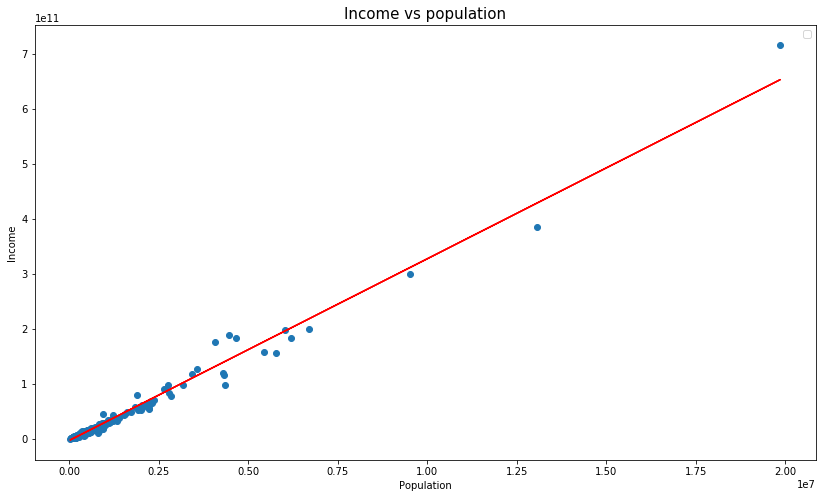

In [90]:
#Visualizing the regression fit
plt.figure(figsize=(14,8))
plt.plot(msaDemo['Population'], msaDemo['Income'], 'o')
plt.title('Income vs population', fontsize = 15)
plt.xlabel('Population')
plt.ylabel('Income')
plt.plot(msaDemo['Population'], lm.predict(), '-r')
plt.legend()

In [91]:
##yes there is high correlation between  residual by income and residual by crime as confirmed by high R-squared value and alsothe plot above. 
### Since high R2 value is not always enough to confirm regressin 


In [107]:
msaDemo['predicted-income']= lm.predict(msaDemo)
msaDemo['residual-income']= msaDemo['Income']-msaDemo['predicted-income']
msaDemo.head()

,Population,Area,Income,predicted-income,log-residual-income,residual-income
msa,,,,,,
10180,167171,2743.478027,3740034900,3.075919e+09,6.641158e+08,6.641158e+08
10420,703017,900.129156,19560044574,2.076227e+10,-1.202222e+09,-1.202222e+09
10500,156706,1932.557130,3172077530,2.730507e+09,4.415704e+08,4.415704e+08
10540,118270,2290.129282,2526602010,1.461873e+09,1.064729e+09,1.064729e+09
10580,875567,2811.554500,28078339939,2.645752e+10,1.620819e+09,1.620819e+09


In [108]:
msaCrime_ = msaCrime.merge(msaDemo[['Income','predicted-income','residual-income']],left_index=True, right_index=True)

In [109]:
msaCrime_[['log-residual','residual-income']].corr()

,log-residual,residual-income
log-residual,1.0000,-0.3368
residual-income,-0.3368,1.0000


In [94]:
msaCrime.head()

,Population,Crimes,Violent Crimes,Property Crimes,predicted-crime,log-residual
msa,,,,,,
36140,95344.0,3,2,1,6.341549,-3.341549
14460,300621.0,9,5,4,7.291920,1.708080
38300,2154097.0,17,12,5,8.921674,8.078326
38540,83347.0,65,7,58,6.230256,58.769744
40660,96063.0,97,17,80,6.347767,90.652233
